In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#使用pandas打开稀疏矩阵
import pandas as pd

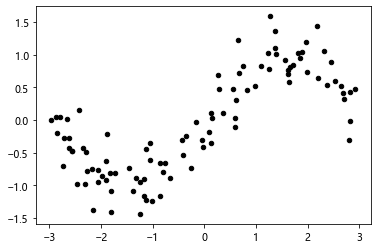

In [40]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape
X = X.reshape(-1, 1)

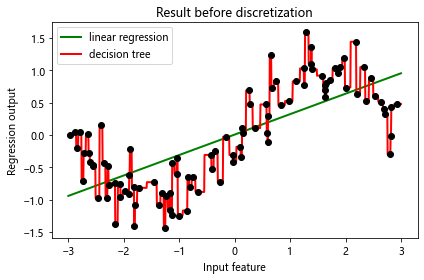

In [41]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)
#放置画布
fig, ax1 = plt.subplots(1)
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
        label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
        label="decision tree")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import KBinsDiscretizer
#将数据分箱
#encode模式"onehot"：使用做哑变量方式做离散化
#之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
#对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0
enc = KBinsDiscretizer(n_bins=10 #分几类？
                       ,encode="onehot") #ordinal
X_binned = enc.fit_transform(X)

In [43]:
X.shape

(100, 1)

In [44]:
X_binned.shape

(100, 10)

In [45]:
pd.DataFrame(X_binned.toarray()).head()
X_binned.shape #训练

(100, 10)

In [46]:
#我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)


In [47]:
#因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)
line_binned.shape #分箱后的数据是无法进行绘图的

(1000, 10)

In [48]:
LinearR_.predict(line_binned).shape

(1000,)

In [49]:
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

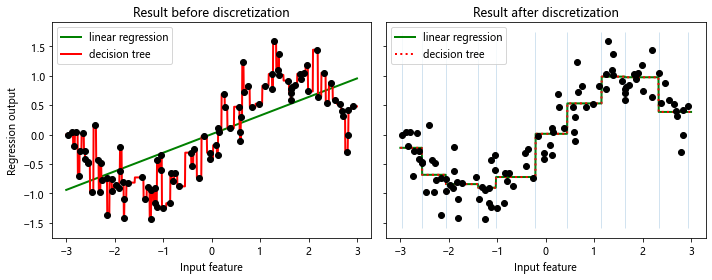

In [50]:
#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
                 , sharey=True #让两张图共享y轴上的刻度
                 , figsize=(10, 4))
#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
         , *plt.gca().get_ylim() #y轴的上限和下限
         , linewidth=1
          , alpha=.2)
#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')
#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

0.8649069759304867


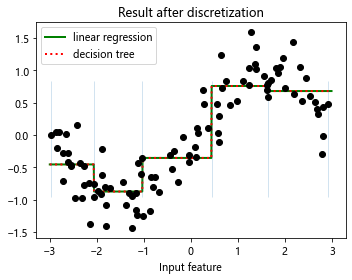

In [51]:
enc = KBinsDiscretizer(n_bins=5,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
fig, ax2 = plt.subplots(1,figsize=(5,4))
LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

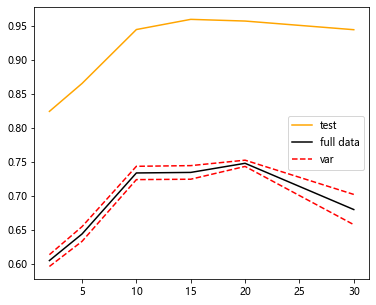

In [53]:
from sklearn.model_selection import cross_val_score
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = cross_val_score(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

## 多项式回归

In [54]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X


array([[1],
       [2],
       [3]])

In [55]:
#二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)
#接口transform直接调用
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [56]:
X_.shape
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [60]:
#三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)
xxx.shape

(3, 4)

In [61]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [62]:
#生成了多少个系数？
LinearRegression().fit(xxx,y).coef_


array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [63]:
#查看截距
LinearRegression().fit(xxx,y).intercept_
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept

1.2351711202036895

In [64]:
#生成了多少个系数？
LinearRegression().fit(xxx,y).coef_
#查看截距
LinearRegression().fit(xxx,y).intercept_

1.2351711202036895

In [66]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [67]:
#尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [68]:
#尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [69]:
PolynomialFeatures(degree=2).fit_transform(X)
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)
#对比之下，当interaction_only为True的时候，只生成交互项

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [70]:
#更高维度的原始特征矩阵
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [71]:
PolynomialFeatures(degree=2).fit_transform(X)
PolynomialFeatures(degree=3).fit_transform(X)
X_ = PolynomialFeatures(degree=20).fit_transform(X)
X_.shape

(3, 1771)

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
#对训练数据的拟合
LinearR.score(X,y)
#对测试数据的拟合
LinearR.score(line,np.sin(line))
#多项式拟合，设定高次项
d=5
#进行高此项转换
poly = PolynomialFeatures(degree=d)
X_ = poly.fit_transform(X)
line_ = PolynomialFeatures(degree=d).fit_transform(line)
#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787976

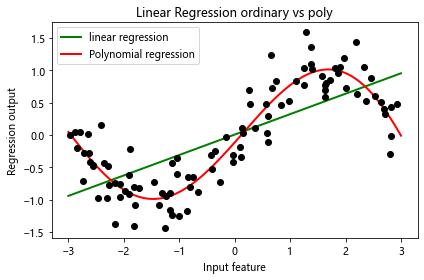

In [74]:
import matplotlib.pyplot as plt
d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PolynomialFeatures(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PolynomialFeatures(degree=d).fit_transform(line)
#放置画布
fig, ax1 = plt.subplots(1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
       ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
         ,label="Polynomial regression")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()
#来一起鼓掌，感叹多项式回归的神奇

In [75]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [76]:
poly = PolynomialFeatures(degree=5).fit(X)
#重要接口get_feature_names
poly.get_feature_names()

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

使用加利佛尼亚房价数据集给大家作为例子，当我们有标签名称的时候，可以直接在接口get_feature_names()中输
入标签名称来查看新特征究竟是由原特征矩阵中的什么特征组成的

In [79]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
housevalue.feature_names
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
     ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
poly = PolynomialFeatures(degree=2).fit(X,y)
poly.get_feature_names(X.columns)

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [81]:
X_ = poly.transform(X)
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)
coef = reg.coef_
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('1', 5.919548979451466e-08),
 ('住户收入中位数', -11.24302548299935),
 ('房屋使用年代中位数', -0.8488985511052133),
 ('平均房间数目', 6.441059349843383),
 ('平均卧室数目', -31.591330763254792),
 ('街区人口', 0.00040609062532270633),
 ('平均入住率', 1.003862326514533),
 ('街区的纬度', 8.70568191419001),
 ('街区的经度', 5.880632741524842),
 ('住户收入中位数^2', -0.03130812412478552),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599473264526876),
 ('住户收入中位数 平均房间数目', 0.04330204481030008),
 ('住户收入中位数 平均卧室数目', -0.1861422968683334),
 ('住户收入中位数 街区人口', 5.7283133376319876e-05),
 ('住户收入中位数 平均入住率', -0.0025901946916912564),
 ('住户收入中位数 街区的纬度', -0.1525057196838008),
 ('住户收入中位数 街区的经度', -0.1442429441109192),
 ('房屋使用年代中位数^2', 0.00021172536278806547),
 ('房屋使用年代中位数 平均房间数目', -0.0012621898754027279),
 ('房屋使用年代中位数 平均卧室数目', 0.010611503993005564),
 ('房屋使用年代中位数 街区人口', 2.8188534961846406e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694558569297),
 ('房屋使用年代中位数 街区的纬度', -0.010069037355560558),
 ('房屋使用年代中位数 街区的经度', -0.009999501774406838),
 ('平均房间数目^2', 0.007269477327343921),
 ('平均房间数目 平均卧室数

In [82]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T
coeff.columns = ["feature","coef"]
coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.591331
1,住户收入中位数,-11.243025
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.087191
25,平均房间数目 平均卧室数目,-0.068906


In [84]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)
reg = LinearRegression().fit(X,y)
reg.score(X,y)
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7451090627097201
time:0.4198479652404785


In [85]:
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor
time0 = time()
print("R2:{}".format(RandomForestRegressor(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9744799325190798
time:9.410208463668823
